In [64]:
import cv2
from matplotlib import pyplot as plt
import copy as cp
%matplotlib inline

### Read in and show image in jupyter notebook

In [13]:
file1 = "../data/pics/shirts/male_shirt_1.png"

In [ ]:
#image = plt.imread(file)

In [58]:
im = cv2.imread(file, cv2.IMREAD_UNCHANGED)

In [24]:
def show_image(image):
    # http://www.learningaboutelectronics.com/Articles/How-to-display-an-OpenCV-image-in-Python-with-matplotlib.php
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [20]:
im.shape

(177, 118, 4)

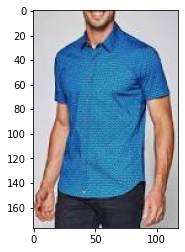

In [26]:
show_image(im)

### Resize, Rotate, Crop
https://www.pyimagesearch.com/2014/01/20/basic-image-manipulations-in-python-and-opencv-resizing-scaling-rotating-and-cropping/

In [78]:
def cv_resize(image, h=0, w=0, keep_ratio=True):
    # we need to keep in mind aspect ratio so the image does
    # not look skewed or distorted -- therefore, we calculate
    # the ratio of the new image to the old image
    orig_h = image.shape[0]
    orig_w = image.shape[1]
    if keep_ratio and h == 0 and w == 0:
        return image
    elif keep_ratio and h != 0 and w != 0:
        raise Exception(" When both h and w are given, can't choose keep_ratio. Please give only h or w.") 
    elif keep_ratio and w != 0:
        r = w / orig_w
        dim = (w, int(orig_h * r))
    elif keep_ratio and h != 0:
        r = h / orig_h
        dim = (int(orig_w * r), h)
    elif h == 0 or w == 0:
        raise Exception("h or w is 0 while keep_ratio is false. ")
    else:
        dim = (w, h)
    # perform the actual resizing of the image and show it
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized

In [93]:
resized_im = cv_resize(im, h=100, w=0, keep_ratio=True)
resized_im.shape

(100, 66, 4)

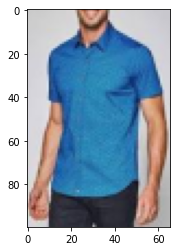

In [91]:
show_image(resized_im)

In [34]:
def cv_rotate(image, degree):
    # grab the dimensions of the image and calculate the center
    # of the image
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)
    # rotate the image by 180 degrees
    M = cv2.getRotationMatrix2D(center, degree, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

In [35]:
rotated_im = cv_rotate(im, 180)

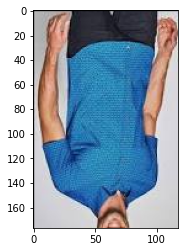

In [36]:
show_image(rotated_im)

In [50]:
def cv_crop(image, h_start, h_end, w_start, w_end):
    # crop the image using array slices -- it's a NumPy array
    # after all!
    cropped = image[h_start:h_end, w_start:w_end]
    return cropped

In [51]:
cropped_im = cv_crop(im, 0, 100, 0, 100)

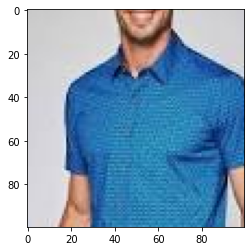

In [52]:
show_image(cropped_im)

### Find the center of a blob
https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/

In [65]:
def find_center(image):
    img = cp.deepcopy(image)
    # convert image to grayscale image
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # convert the grayscale image to binary image
    ret,thresh = cv2.threshold(gray_image,127,255,0)
    # calculate moments of binary image
    M = cv2.moments(thresh)
    # calculate x,y coordinate of center
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    # put text and highlight the center
    cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
    cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    return img, cX, cY

In [66]:
center_marked_im, cX, cY = find_center(im)

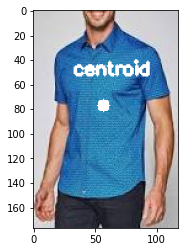

In [67]:
show_image(center_marked_im)

###  Put them together

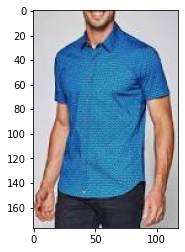

In [69]:
show_image(im)

In [70]:
center_marked_im, cX, cY = find_center(im)